In [2]:
import numpy as np
import os
import time
import global_params
import cat_params
from image_functions import read_images, show_images, save_images
import bit_functions as bf

# **Read plain images**

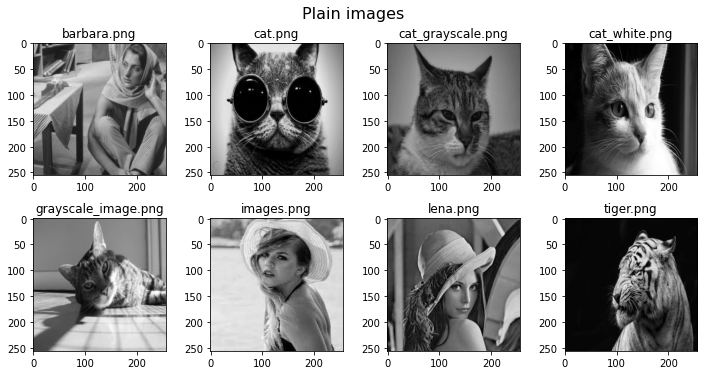

In [3]:
list_os = ['Windows', 'Linux']
OS = list_os[1]
path = 'C:\\Users\\HH\\Documents\\DICOM\\MIE_Cryptography\\' if OS == 'Windows' else '/home/anhpq0/MIE_Cryptography/'
dir_plain = path + 'plain_images'

R_iterations = 5
kI, str_Fnames = read_images(dir_plain, size = (global_params.M, global_params.N), OS = OS)
show_images(kI, str_Fnames, size = (10, 10), rows = 4, cols = 4)

# Destination folder
dir_cipher = path + 'cipher_images' + global_params.NamePCM

if not os.path.exists(dir_cipher):
    os.mkdir(dir_cipher)

In [ ]:
# kC
kC = kI.copy()
# for k in range(global_params.K):
#     for i in range(global_params.N):
#         for j in range(global_params.M):
#             kC[k][i][j] = global_params.fl2fx(kI[k][i][j])

#kC-
kC_minus = np.copy(global_params.kC0)

#kP+
kP_plus = np.zeros((global_params.K, 1))
for k in range(global_params.K):
    kP_plus[k] = kC[k][0][1]

# **Encryption**

In [ ]:
print("================================START ENCRYPTION PROCESSING================================")
for n in range(global_params.Ne):
    start_time = time.time() # Record start time in seconds unit
    print("\n")
    print("==============================================")
    print("================ STEP ", n, "================")
    print("==============================================")
    for i in range(global_params.M):
        for j in range(global_params.N):
            E = bf.MIE_Bit_Manipulation(kC_minus, kP_plus, cat_params.k1_cat)
            print("+) E = ", E)

            X_R = bf.PCM_Cat(E, R_iterations)
            print("+) X_R = ", X_R)

            XY_new, pseudoVal_string_C, pseudoVal_string_Cx = bf.MIE_FAST_XYnew_pseudoVal(Xn               = X_R, 
                                                                                          XY               = [i, j], 
                                                                                          Yp_MN            = cat_params.Yp_256x256_Cat,
                                                                                          Y_inter_images_p = cat_params.Y_inter_images_p8_Cat,
                                                                                          Yd_C             = cat_params.Yd_C_Cat,
                                                                                          Yd_Cx            = cat_params.Yd_Cx_Cat)
            print("+) XY_new = ", XY_new)
            print("+) pseudoVal_string_C = ", pseudoVal_string_C)
            print("+) pseudoVal_string_Cx = ", pseudoVal_string_Cx)

            kC_ij, kP_plus, kI = bf.MIE_FAST_Perm_and_Diff_pixels_ENC(kI = kC,
                                                                      XY = [i, j],
                                                                      XY_new = XY_new,
                                                                      pseudoVal_string_C = pseudoVal_string_C,
                                                                      pseudoVal_string_Cx = pseudoVal_string_Cx,
                                                                      kC_minus = kC_minus,
                                                                      n = n)
            print("+) kC_ij = ", kC_ij)
            print("+) kP_plus = ", kC_ij)
            print("+) kI = ", kI)

    end_time = time.time() # Record end time in senconds unit
    print("Simulation time of step ", n, ": ", end_time - start_time)

# **Read cipher image**

In [ ]:
kI_cipher, str_Fnames_cipher = read_images(dir_cipher, size = (global_params.M, global_params.N), OS = OS)
show_images(kI_cipher, str_Fnames_cipher, size = (10, 10), rows = 4, cols = 4)

# kC_cipher
kC_cipher = kI.copy()

#kC_cipher-
kC_cipher_minus = np.zeros((global_params.K, 1))
for k in range(global_params.K):
    kC_cipher_minus[k] = kC[k][global_params.M-1][global_params.N-2]

#kP_cipher+
kP_cipher_plus = np.copy(global_params.kP0)

# **Decryption**

In [ ]:
print("================================START DECRYPTION PROCESSING================================")
for n in range(global_params.Ne - 1, -1, -1):
    start_time = time.time() # Record start time in seconds unit
    print("\n")
    print("==============================================")
    print("================ STEP ", n, "================")
    print("==============================================")
    for i in range(global_params.M - 1, -1, -1):
        for j in range(global_params.N - 1, -1, -1):
            E = bf.MIE_Bit_Manipulation(kC_cipher_minus, kP_cipher_plus, cat_params.k1_cat)
            print("+) E = ", E)

            X_R = bf.PCM_Cat(E, R_iterations)
            print("+) X_R = ", X_R)

            XY_new, pseudoVal_string_C, pseudoVal_string_Cx = bf.MIE_FAST_XYnew_pseudoVal(Xn               = X_R, 
                                                                                          XY               = [i, j], 
                                                                                          Yp_MN            = cat_params.Yp_256x256_Cat,
                                                                                          Y_inter_images_p = cat_params.Y_inter_images_p8_Cat,
                                                                                          Yd_C             = cat_params.Yd_C_Cat,
                                                                                          Yd_Cx            = cat_params.Yd_Cx_Cat)
            print("+) XY_new = ", XY_new)
            print("+) pseudoVal_string_C = ", pseudoVal_string_C)
            print("+) pseudoVal_string_Cx = ", pseudoVal_string_Cx)

            kC_cipher_minus, kP_cipher_plus, kC = bf.MIE_FAST_Perm_and_Diff_pixels_ENC(kI = kC,
                                                                                       XY = [i, j],
                                                                                       XY_new = XY_new,
                                                                                       pseudoVal_string_C = pseudoVal_string_C,
                                                                                       pseudoVal_string_Cx = pseudoVal_string_Cx,
                                                                                       kC_minus = kC_cipher_minus,
                                                                                       n = n)
            print("+) kC_cipher_minus = ", kC_ij)
            print("+) kP_cipher_plus = ", kC_ij)
            print("+) kC = ", kI)

    end_time = time.time() # Record end time in senconds unit
    print("Simulation time of step ", n, ": ", end_time - start_time)